# Gym Usage Analysis

## Data set description

The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, it also has additional information re including weather and semester-specific information that might affect how crowded it is. 

Cloumns:
<ul>
<li>Number of people (int; number of people in the gym at the time)</li>
<li>date (datetime)</li>
<li>timestamp (int; number of seconds since beginning of day)</li>
<li>day_of_week (int; 0 - 6)</li>
<li>is_weekend (int; 0 or 1)</li>
<li>is_holiday (int; 0 or 1)</li>
<li>temperature (float; degrees fahrenheit)</li>
<li>is_start_of_semester (int; 0 or 1)</li>
<li>is_during_semester (int; 0 or 1)</li>
</ul>

## Data preparation

The preparation of data has been at the start of each of the different problems that we are tackling. This section gives an overview of the techniques used with their requirements. 

The actual code is at the start of each of the individual  priblems.
<ol>
<li>df.temperature = (df.temperature-32)*5/9 - Celsius is a more universally used metric system.</li>
<li>Date column
    <ul>
    <li>df['date'] = pd.to_datetime(df['date']) - Convert date column to datetime type to perform date operations </li>
    <li>df['month'] = df['date'].dt.month - Get month from date and save to a new column</li>
    </ul>
</li>
<li>df['hour'] = (df.timestamp/3600).astype(int) - Determining the hour of the day and creating a new column</li>
<li>df.dropna(inplace=True) </li>
<li>df3.drop('date',axis=1,inplace=True) - Drop date to able to run linear regression</li>
<li>Dummy Column Creation
     <ul>
        <li>columns = ["day_of_week", "month", "hour"], df = pd.get_dummies(df, columns=columns) - Create dummy cloumns determining the day of week</li>
        <li>month and hour for running the Randon Forest Regression</li>
</ul>
</li>     
</ol>

## Summary of the finding


The main reason for analyzing this data is to help the university with the staffing, facilites and open hour modifications. Apart from that it also enables the students to find the best possible time for them to go to the gym depending ont heir preference of how crowded they want the gym.


### Most Interesting Finding

<ul>
<li>The most crowded time in a day for an entire week is around 5PM on Friday right befre the weekend. We attribute this to people going out for the weekend and wanting to look good for that reason. This is interesting because we see that days towards the end of the week are least crowded but this particulr time on Friday has almost the highest number of people at a given time in the entire week</li>
</ul>

### Other Findings
<ul>
<li>The busiest months are February right before spring break, April before finals and summer break and September right after the semeser begin. This data helps the university to plan for additional staff adjustments.</li>
<li>The least crowded times in the gym are between 12AM and 6 AM and can be used to amend the operating hours to save on utilities.</li>
<li>The days of the weekend can be used to maintenance work as they are likely to have the least impact given that they have the least number of people on average.
</li>
</ul>

In [68]:
%matplotlib inline
from sklearn import linear_model
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score

In [69]:
df=pd.read_csv('data.csv')
df.head()
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['hour'] = (df.timestamp/3600).astype(int)
df.temperature = (df.temperature-32)*5/9 # converting Farenheit to Celsius
df.dropna(inplace=True)
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-15 00:00:11,61211,4,0,0,22.088889,0,0,8,17
1,45,2015-08-15 00:20:14,62414,4,0,0,22.088889,0,0,8,17
2,40,2015-08-15 00:30:15,63015,4,0,0,22.088889,0,0,8,17
3,44,2015-08-15 00:40:16,63616,4,0,0,22.088889,0,0,8,17
4,45,2015-08-15 00:50:17,64217,4,0,0,22.088889,0,0,8,17


In [70]:
df.shape

(62184, 11)

### Let's start off by looking at the number of people in gym by dividing it into hours in a day, days of the week and months in a year

### 1. By Hours

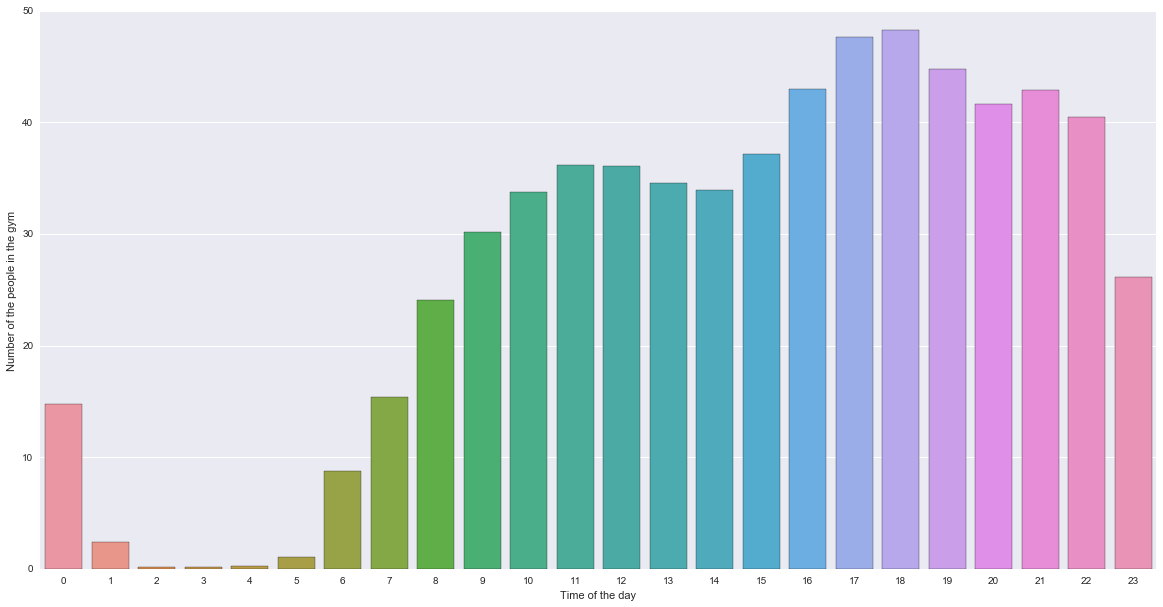

In [72]:
df1=df.copy()
avg_num_people=df1.groupby('hour').mean()['number_people']
sns.barplot(np.arange(24),avg_num_people,orient='v')
plt.xlabel('Time of the day')
plt.ylabel('Number of the people in the gym')
plt.rcParams['figure.figsize']=(20,10)
plt.show()

### Findings

It's clear from the above chart the busiest times for the gym are in the evening, we can safely say that the busiest time in a day are between 6PM and 10PM with the number peaking at aroung 6PM.

There is a drop after which we can attributed to dinner time, as we can see the numbers increase again after an hour but it is still not as high as 6 PM as studies show that people are less likely to work out immediately after a meal.

## 2. Days of the Week

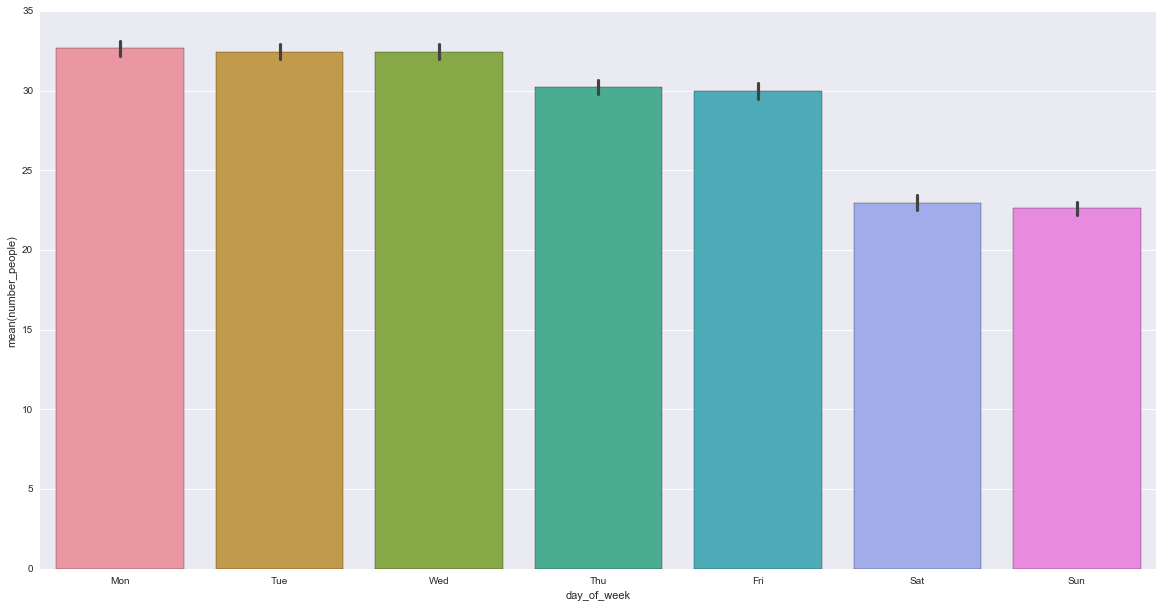

In [35]:
day=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.barplot(df.day_of_week,df.number_people)
plt.xticks(np.arange(len(day)),day)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

### Findings

This chart gives us the average number of people in the gym for each day of the week. We know from the previous chart as to what busiest times in a day.

The results are pretty straight forward with Mon, Tue and Wed having almost the same number of people with sharp drop druing the weekends.

## 3. Months

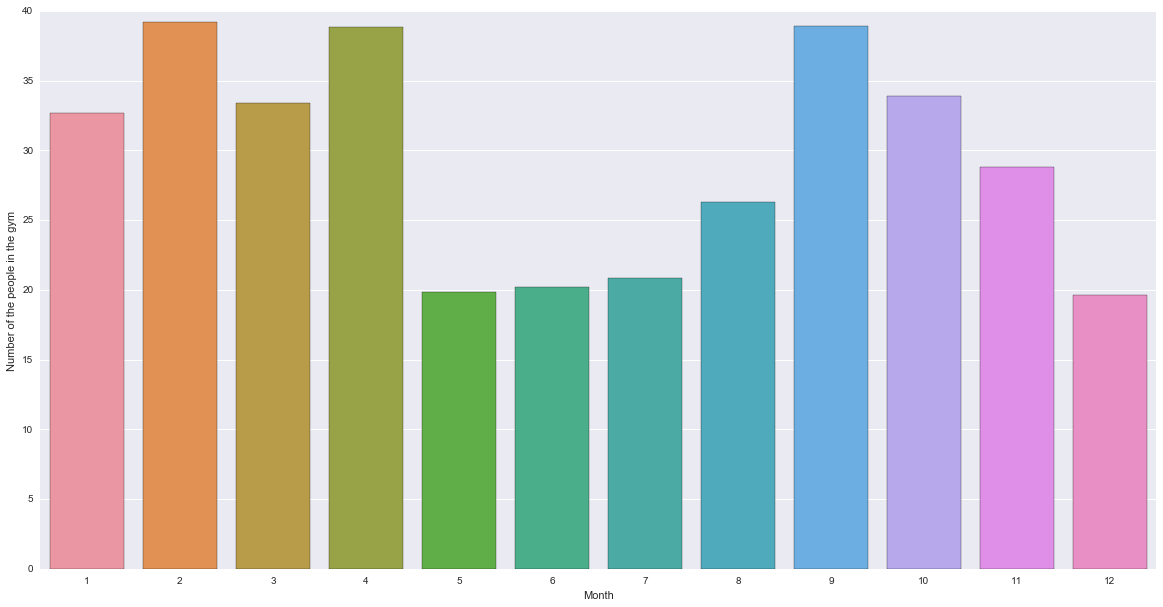

In [36]:
df2=df.copy()
num_people_avg=df1.groupby('month').mean()['number_people']
sns.barplot(np.arange(1,13),num_people_avg,orient='v')
plt.xlabel('Month')
plt.ylabel('Number of the people in the gym')
plt.rcParams['figure.figsize']=(20,10)
plt.show()

### Findings

The findings for the months are a little more interesting.

As we can see at the start of the school year in September the numbers are very high with a sharp decline in the following months till Feb. This allows to draw conclusions on gym visitation habits of people in relation to weather. <b> The colder the weather is the less likely people are to go to the gym.</b> The summer months are the least because this is usually the summer vacation and the number of poeple staying on campus is drastcally reduced.

There are two more interesting finsings in this chart.
<ol>
<li> February is the busiest month of the year. This is because of the spring break which come in March. As we all know this holiday is usually attributed to beach front revelry, so we can imply the spike in the poeple is in preparation for this holiday.</li>
<li> Similarly the month of April right before finals and summer vacation is also very busy as people get in shape for their vacation
</ol>

## 4. Correlation of different Factors to the number of people

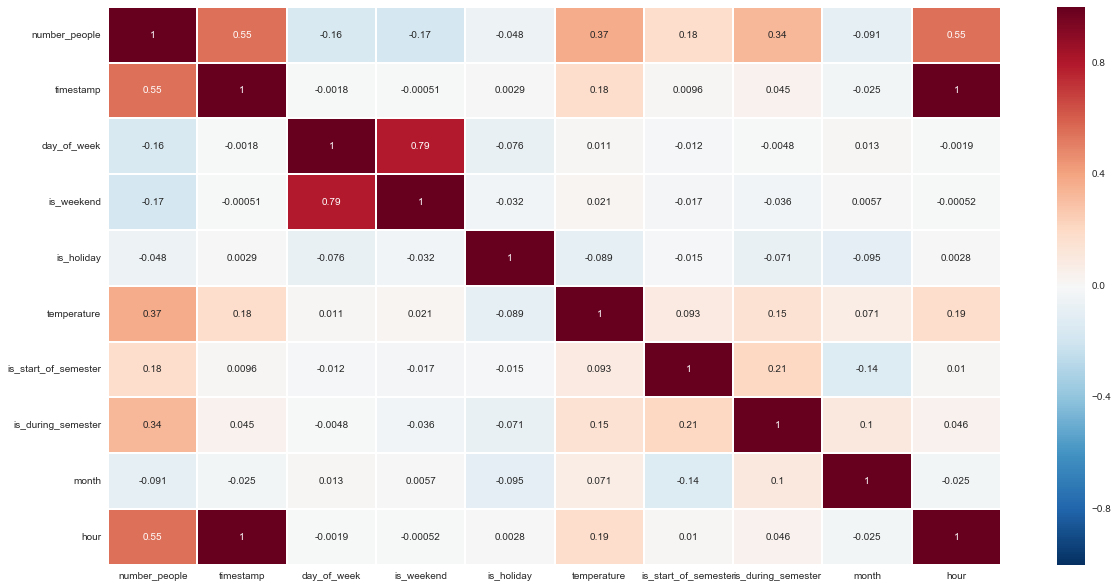

In [37]:
corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=1)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

### Findings

In this section we are going to see the factors which have an interesting impact on the number of people.

<ul>
<li>Temperature has a positive correlation with the number of people. It shows that higher the teperature the greate the number of people in the gym. </li>
<li>Timestamp shows us that as the day progresses the number of people in the gym increases, this is the same as hour.</li>
<li>Weekends have a negative correlation as do holidays. The number of people decreases if it is a weekend or a holiday.</li>
</ul>

## 5. Number of people at a given time on a given day

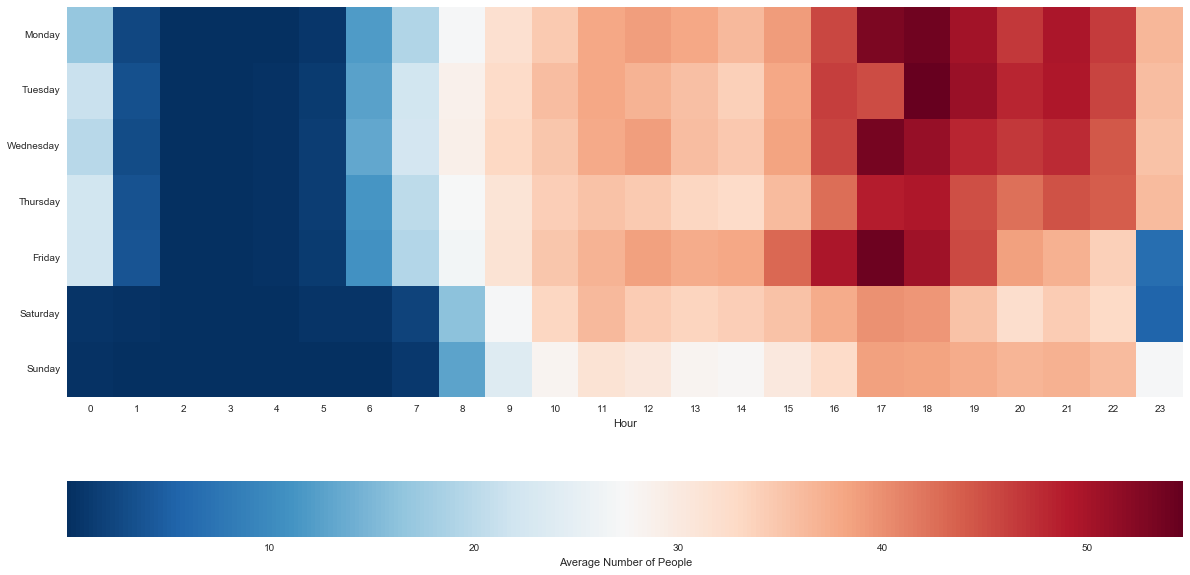

In [38]:
g = df[['hour','number_people','day_of_week']]

#Group by time and day
F = g.groupby(['hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','hour', 'number_people').fillna(0)


grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

dow= 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()
dow.reverse()

ax = sns.heatmap(F, cmap='RdBu_r',cbar_kws={"orientation": "horizontal"})
ax.set_yticklabels(dow, rotation = 0)
ax.set_ylabel('')
ax.set_xlabel('Hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Average Number of People')

### Findings

This chart shows in terms of a heatmap the greates concentrations of people in the gym at a given point at differen days of the week. Red is a high concentration and blue is lesser.

We can see that based on the darkest reds the busies times are Tuesday at 6PM, Wednesday at 5PM and Friday at 5PM. We already knew from the previous charts that the number of people was always high at the start of the week. The surprising find id the Friday 5PM slot which has one of the gighest of the entire week.
This is interesting as it demonstrates the humans psychological need to impress. Friday is the end of the week nd the most common day where people go out. <b> It can be said that people got to the gym a lot more on Fridays to look the best they can for theirnight out on the town.</b>

## Machine Learning

For the machine learning exercise two different regression algorithms were used, Linear Regression and Random Forest Regression.

Linear regression was very fast and return a accuracy probability of approximately .51.</br>

While the Random Forest Regressiion took a lot longer to run and returned with an accuracy of .91 appromimately when 10 estimators were used. I further studied the effect of increasing the number of estimators and the change to the accuracy by plotting a simple line graph.

If efficiency is the factor the linear regression is a clear winner, while if we need accuracy the second method offers a much greater benefit.

### 1. Linear Regresion

In [39]:
df3=df.copy()
df3.drop('date',axis=1,inplace=True)
X=df3.drop('number_people',axis=1)
y=df3.number_people

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [41]:
model=linear_model.LinearRegression()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.50959109380073553

### 2. Random Forest Regression

In [42]:
df = df.drop("date", axis=1)
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,61211,0,0,22.088889,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45,62414,0,0,22.088889,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,63015,0,0,22.088889,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44,63616,0,0,22.088889,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,64217,0,0,22.088889,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,46,64818,0,0,22.305556,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,43,66008,0,0,22.305556,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,53,66609,0,0,22.305556,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,54,67214,0,0,22.305556,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,43,67815,0,0,22.305556,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Setting the test and training data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model = RandomForestRegressor(n_jobs= -1)

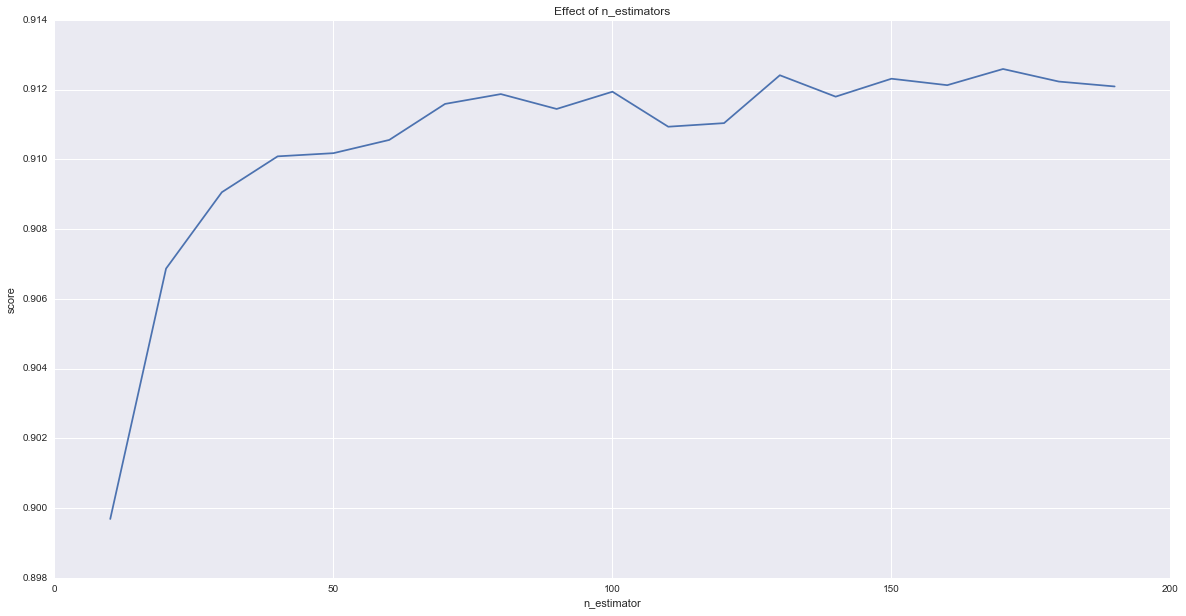

In [66]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [51]:
scores

[0.89864238999346413,
 0.90554593801605177,
 0.90714438932290953,
 0.90846731553028048,
 0.908420084122877,
 0.90847454270530026,
 0.90836196733430075,
 0.90946545550566582,
 0.90979215647263689,
 0.90887438342290949,
 0.9096535887790943,
 0.90975510560318995,
 0.91033964656914668,
 0.90992427405261855,
 0.910102914766309,
 0.90979761286422789,
 0.90963335770586895,
 0.91025360196209282,
 0.90997233242943021]